In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:

def add_to_data(file):
    with open(file, 'r') as f:
        data = json.load(f)
    data['file_prefix'] = os.path.basename(file)[:5]
    return data

# add all json files in scores/
data = []
for file in os.listdir('model_wise'):
    if file.endswith('.json'):
        file_name = "model_wise/" + file
        data.append(add_to_data(file_name))

# Create a DataFrame
df = pd.DataFrame(data)

df

,bert_raw,bert_score,bleu,rouge1,rouge2,rougeL,chrf,chrf_plus,chrf_plus_plus,file_prefix
0,0.869390,0.226129,0.045072,0.346115,0.104913,0.232893,2.910261,2.910261,5.648117,run-3
1,0.870129,0.230504,0.082858,0.429320,0.138135,0.225192,1.052429,1.052429,2.082087,run-1
2,0.873770,0.252076,0.052913,0.360501,0.110589,0.242044,2.941916,2.941916,5.708650,run-5
3,0.868463,0.220637,0.046771,0.347073,0.102280,0.234771,2.901227,2.901227,5.631696,run-4
4,0.852080,0.123564,0.006770,0.295045,0.076892,0.169008,1.963719,1.963719,3.829226,mlp-1
5,0.865949,0.205736,0.035999,0.330350,0.091007,0.220278,3.007718,3.007718,5.830574,run-2


run 1 512 d 6 l 8 h 10% data 10 epochs
run 2 1024 d 6 l 8 h 10% data 10 epochs
run 3 256 d 6 l 8 h 10% data 10 epochs
run 4 512 d 6 l 8 h 100% data 1 epoch
run 5 768 d 12 l 8 h 100% data 2 epoch

In [122]:
# rescale the scores 
df['bert_raw'] = (df['bert_raw'] * 5) + 5
df['bert_score'] = (df['bert_score'] * 5) + 5
df['bleu'] = df['bleu'] * 10
df['rouge1'] = df['rouge1'] * 10
df['rouge2'] = df['rouge2'] * 10
df['rougeL'] = df['rougeL'] * 10
df['chrf'] = df['chrf'] / 10
df['chrf_plus'] = df['chrf_plus'] / 10
df['chrf_plus_plus'] = df['chrf_plus_plus'] / 10

In [123]:
# remove the row where file_prefix is 'h'
df = df[df.file_prefix != 'h']

# sort by the file_prefix
df = df.sort_values(by='file_prefix')

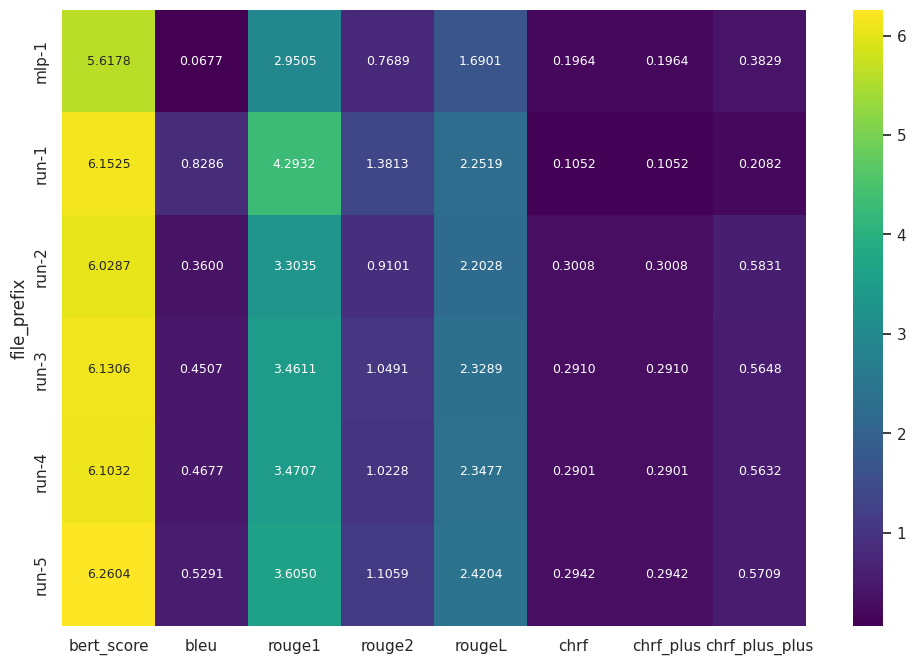

In [124]:
df = df.drop(columns=['bert_raw'])

# Set the figure size
plt.figure(figsize=(12, 8))

# Set the file_prefix column as the index
df.set_index('file_prefix', inplace=True)

# Plot as a heatmap with more precision
sns.heatmap(df, annot=True, fmt=".4f", cmap="viridis", annot_kws={"size": 9})

# Show the plot
plt.show()

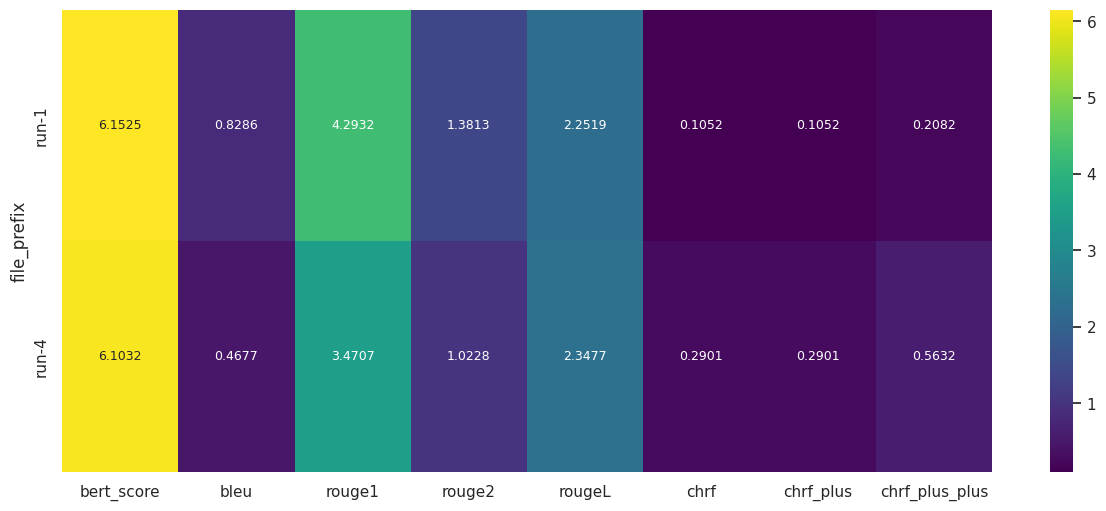

In [125]:
# compare only run 1 and run 4
df = df[['bert_score', 'bleu', 'rouge1', 'rouge2', 'rougeL', 'chrf', 'chrf_plus', 'chrf_plus_plus']]

# select only those rows where file-prefix is either run1 or run4
df = df.loc[['run-1', 'run-4']]

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot as a heatmap with more precision
sns.heatmap(df, annot=True, fmt=".4f", cmap="viridis", annot_kws={"size": 9})

# Show the plot
plt.show()